# Mini Project - Churn Prediction in Banking Data

Reference - https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling

### Importing Libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("Datasets/Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Understanding data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.shape

(10000, 14)

In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Exploratory Data Analysis

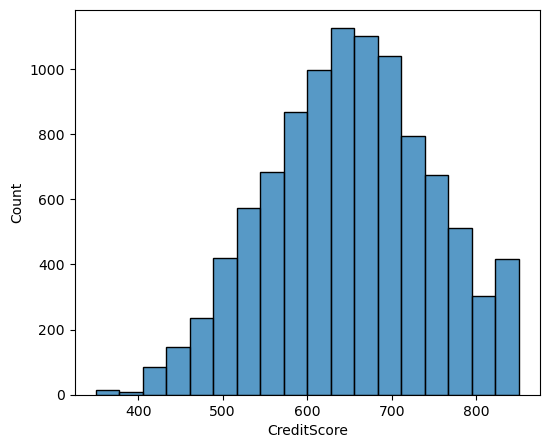

In [9]:
plt.figure(figsize = (6,5))
sns.histplot(data['CreditScore'], bins = 18)
plt.show();

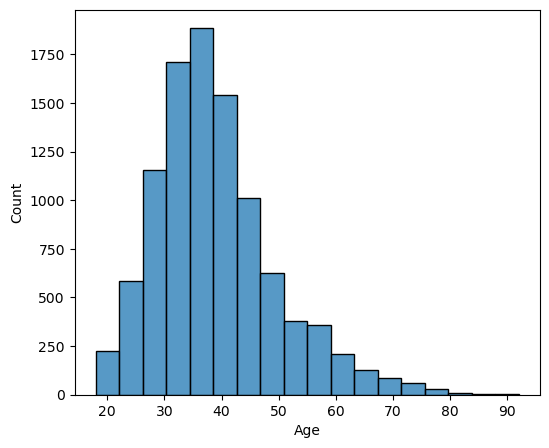

In [10]:
plt.figure(figsize = (6,5))
sns.histplot(data['Age'], bins = 18)
plt.show();

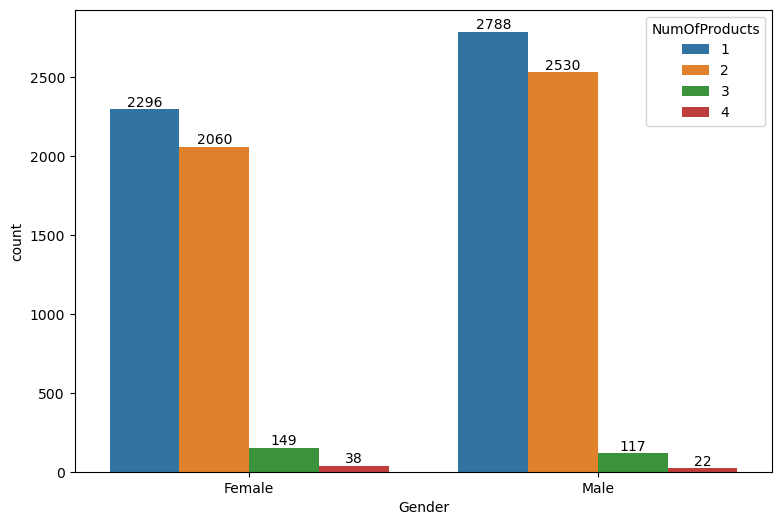

In [14]:
plt.figure(figsize = (9,6))
ax = sns.countplot(x='Gender', data=data, hue = 'NumOfProducts')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

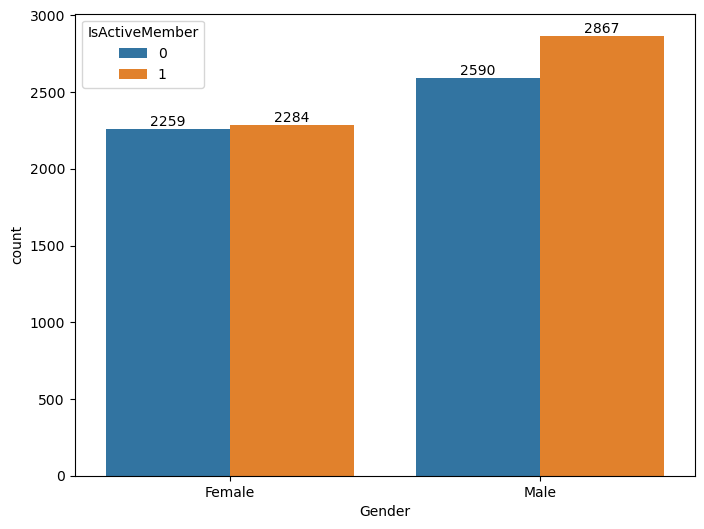

In [18]:
plt.figure(figsize = (8,6))
ax = sns.countplot(x='Gender', data=data, hue = 'IsActiveMember')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

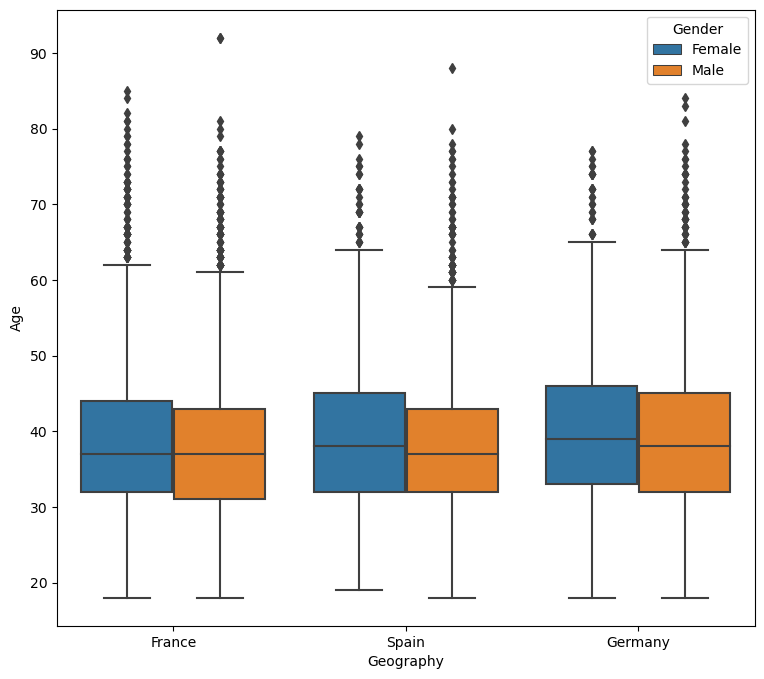

In [21]:
plt.figure(figsize = (9,8))
sns.boxplot(x='Geography', y = 'Age', data=data, hue = 'Gender')
plt.show()

In [49]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

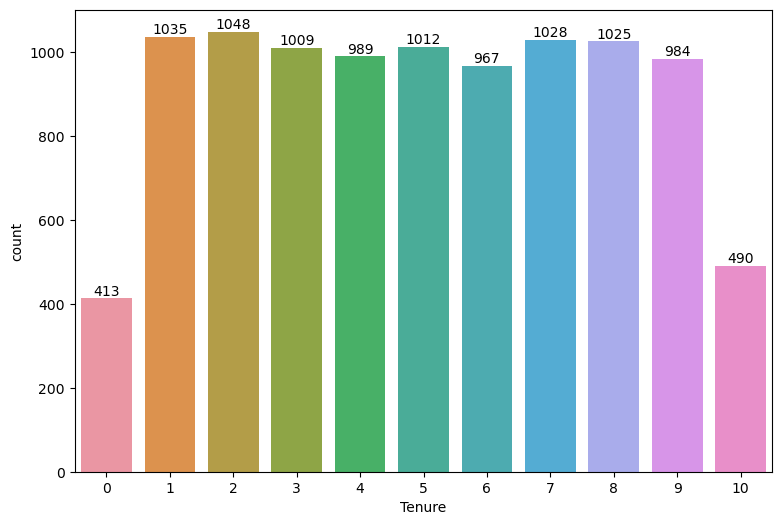

In [51]:
plt.figure(figsize = (9,6))
ax = sns.countplot(x='Tenure', data=data)
ax.bar_label(ax.containers[0]);
plt.show()

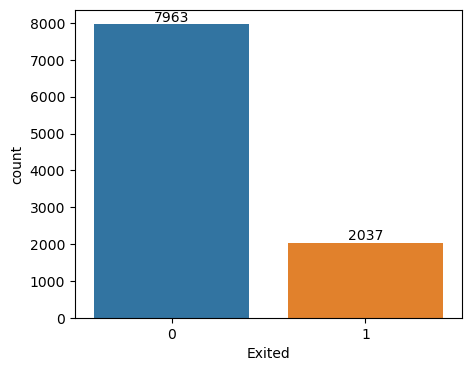

In [54]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x='Exited', data=data)
ax.bar_label(ax.containers[0]);
plt.show()

<Figure size 1000x500 with 0 Axes>

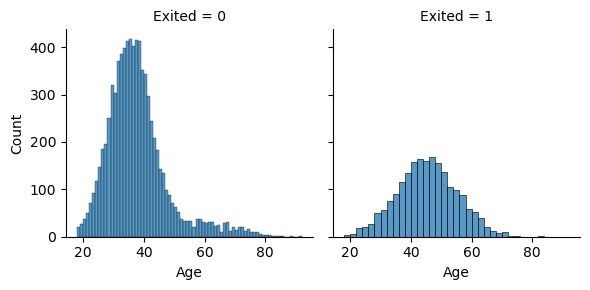

In [56]:
plt.figure(figsize=(10,5))
sns.FacetGrid(data, col='Exited').map(sns.histplot, 'Age')
plt.show()

### Data Preprocessing

In [25]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [27]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
#pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
data['Geography'] = data['Geography'].astype("category").cat.codes
data['Gender'] = data['Gender'].astype("category").cat.codes
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Correlation Analysis

In [30]:
# getting correlation of the data columns with each other

corr_data = data.corr().round(2)
corr_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01
Exited,-0.03,0.29,-0.01,0.12,-0.05,-0.01,-0.16,0.01,1.00


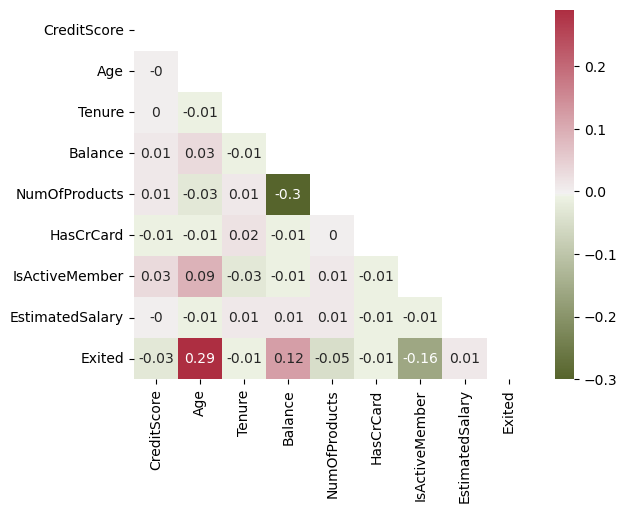

In [31]:
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(np.ones_like(corr_data))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

# using the upper triangle matrix as mask 
sns.heatmap(corr_data, annot=True, mask=matrix, cmap=cmap);

In [36]:
feature_importance = corr_data['Exited'].sort_values(ascending = False)[1:]

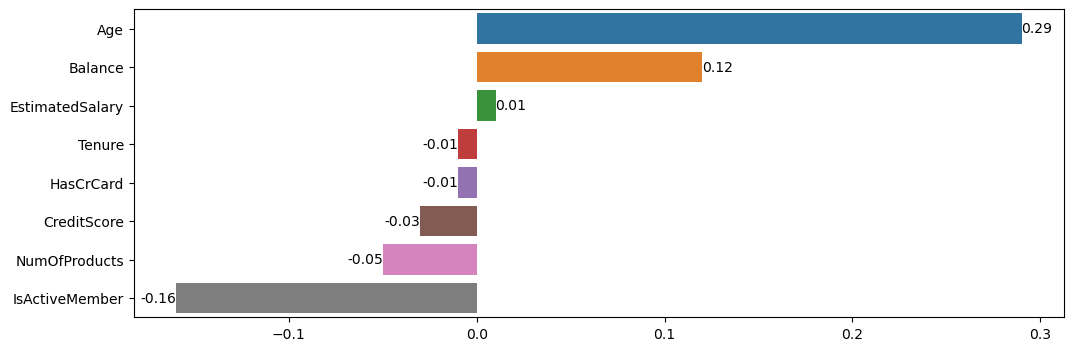

In [48]:
plt.figure(figsize=(12,4))
ax = sns.barplot(y=feature_importance.index, x=feature_importance.values, orient = 'h')
ax.bar_label(ax.containers[0]);

### Splitting the dataset for Model building

In [64]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [65]:
X = data.drop(['Exited'], axis = 1).values
y = data['Exited'].values

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [71]:
X_train.shape, y_train.shape

((8000, 10), (8000,))

In [72]:
X_test.shape, y_test.shape

((2000, 10), (2000,))

### Model Building

In [87]:
rf_classifier = RandomForestClassifier(n_estimators=200)
gb_classifier = GradientBoostingClassifier(n_estimators=200)
xbg_classifier = XGBClassifier()

In [88]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [89]:
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [90]:
xbg_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [91]:
def accuracy_score(model, X_train, X_test, y_train, y_test, return_acc = 0):
    train_acc = round((model.score(X_train, y_train))*100,2)
    test_acc = round((model.score(X_test, y_test))*100,2)
    print(f"Training Accuray from {type(model).__name__}: {train_acc}%")
    print(f"Test Accuray from {type(model).__name__}: {test_acc}%")
    
    if return_acc:
        return train_acc, test_acc

In [92]:
accuracy_score(rf_classifier,
               X_train = X_train, 
               X_test= X_test,
               y_train=y_train,
               y_test=y_test,
               return_acc=0)

Training Accuray from RandomForestClassifier: 100.0%
Test Accuray from RandomForestClassifier: 86.9%


In [93]:
accuracy_score(gb_classifier,
               X_train = X_train, 
               X_test= X_test,
               y_train=y_train,
               y_test=y_test,
               return_acc=0)

Training Accuray from GradientBoostingClassifier: 88.14%
Test Accuray from GradientBoostingClassifier: 87.03%


In [94]:
accuracy_score(xbg_classifier,
               X_train = X_train, 
               X_test= X_test,
               y_train=y_train,
               y_test=y_test,
               return_acc=0)

Training Accuray from XGBClassifier: 96.31%
Test Accuray from XGBClassifier: 85.93%


### Hyperparameter tuning of XGBoostClassifier

In [97]:
xgb_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3,4,5],
    'reg_alpha': [0.1,0.3]
}

In [100]:
grid_search = GridSearchCV(estimator=XGBClassifier(),
                          param_grid=xgb_params,
                          scoring='accuracy',
                          cv = 10)

In [101]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
           

In [102]:
grid_search.best_score_

0.855857142857143

In [103]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1}

Credits: https://www.udemy.com/course/machine-learning-artificial-intelligence-essentials